In [68]:
pip install pmdarima


In [69]:
# check pmdarima

from pmdarima.arima import auto_arima

### ARIMA


In [70]:
from IPython.core.debugger import set_trace


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [71]:
df = pd.read_csv("/content/newaxis.csv")
df.shape

(1479, 2)

#### Fitting the ARIMA model

In [72]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm



In [73]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(df.Adj_Close, order=(1, 1, 1))
result = model.fit()
result.params

ar.L1       0.924531
ma.L1      -0.921294
sigma2    146.115919
dtype: float64

In [74]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 1479
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5780.665
Date:                Sun, 24 Apr 2022   AIC                          11567.330
Time:                        09:31:07   BIC                          11583.225
Sample:                             0   HQIC                         11573.255
                               - 1479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9245      0.308      2.997      0.003       0.320       1.529
ma.L1         -0.9213      0.316     -2.919      0.004      -1.540      -0.303
sigma2       146.1159      2.713     53.860      0.0

In [75]:
x=result.predict(type='levels')

print(df.shape)
df.head()

(1479, 2)


,Date,Adj_Close
0,01-01-2015,488.996094
1,02-01-2015,499.931854
2,05-01-2015,503.091003
3,06-01-2015,485.107880
4,07-01-2015,484.719055


Text(0.5, 1.0, 'ARIMA-Asian Paints')

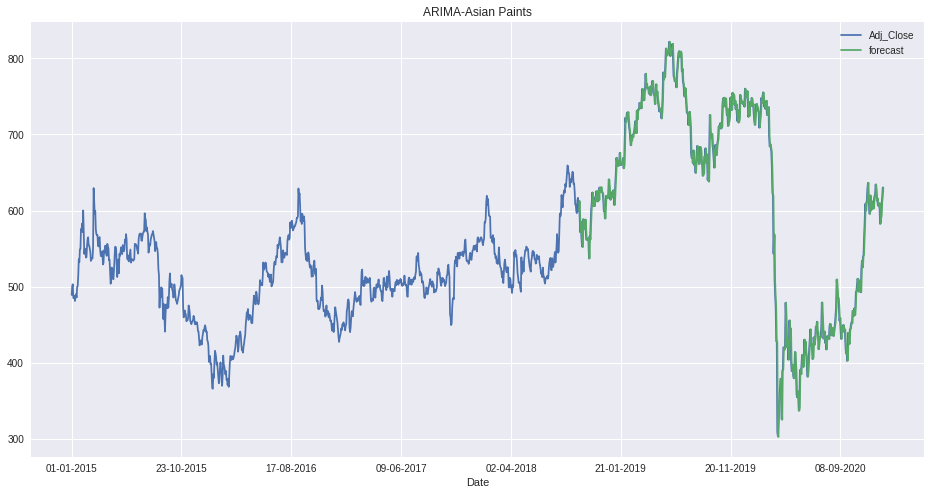

In [76]:
df['forecast']=result.predict(start=924,type='levels')
df.set_index('Date',inplace=True)
df[['Adj_Close','forecast']].plot(figsize=(16, 8))
plt.title('ARIMA-Axis Bank')



### RMSE Value Calculation


In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(df['Adj_Close'][924:len(df)],df['forecast'][924:len(df)]))
print("RMSE=",rms)

RMSE= 14.869453484059012
